In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
classes=["Apple Red 1","Banana","Blueberry", "Eggplant","Mango","Papaya","Pineapple", "Strawberry", "Tomamto 1", "Watermelon"]
traindir = "Data/Train"
testdir = "Data/Test"
IMG_SHAPE = 80
BATCH_SIZE = 32
#train_image = ImageDataGenerator(rescale=1./255,rotation_range=40,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_image = ImageDataGenerator(rescale=1./255, fill_mode='nearest')
train_data = train_image.flow_from_directory(batch_size=BATCH_SIZE,directory=traindir,shuffle=True,target_size=(IMG_SHAPE, IMG_SHAPE),color_mode="grayscale")
test_data = train_image.flow_from_directory(batch_size=BATCH_SIZE,directory=testdir,shuffle=False,target_size=(IMG_SHAPE, IMG_SHAPE),color_mode="grayscale")

Found 1212 images belonging to 12 classes.
Found 1212 images belonging to 12 classes.


In [3]:
totaltrain = 1212
totaltest = 1212

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='softmax')
    ])
model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2654336   
____

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
EPOCHS = 5
BATCH_SIZE = 32
modelhis = model.fit_generator(train_data,
    steps_per_epoch=int(np.ceil(totaltrain / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data,
    validation_steps=int(np.ceil(totaltest / float(BATCH_SIZE)))
    )
model.save("TrainedModel/GestureRecogModel.h5")

Epoch 1/5
38/38 [==============================] - 11s 282ms/step - loss: 0.3831 - acc: 0.9332 - val_loss: 1.5583 - val_acc: 0.8069
Epoch 2/5
38/38 [==============================] - 9s 249ms/step - loss: 0.0529 - acc: 1.0000 - val_loss: 1.3630 - val_acc: 0.8061
Epoch 3/5
38/38 [==============================] - 9s 239ms/step - loss: 0.0350 - acc: 1.0000 - val_loss: 1.2763 - val_acc: 0.8078
Epoch 4/5
38/38 [==============================] - 9s 249ms/step - loss: 0.0304 - acc: 1.0000 - val_loss: 1.2329 - val_acc: 0.8144
Epoch 5/5
38/38 [==============================] - 9s 236ms/step - loss: 0.0213 - acc: 1.0000 - val_loss: 1.2189 - val_acc: 0.8160


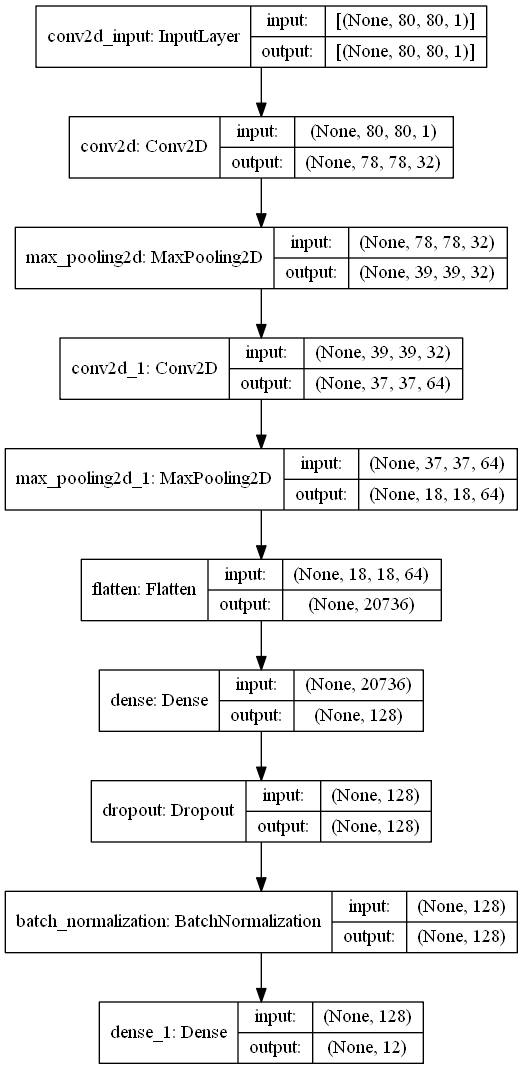

In [6]:
tf.keras.utils.plot_model(model,show_shapes=True)

<AxesSubplot:>

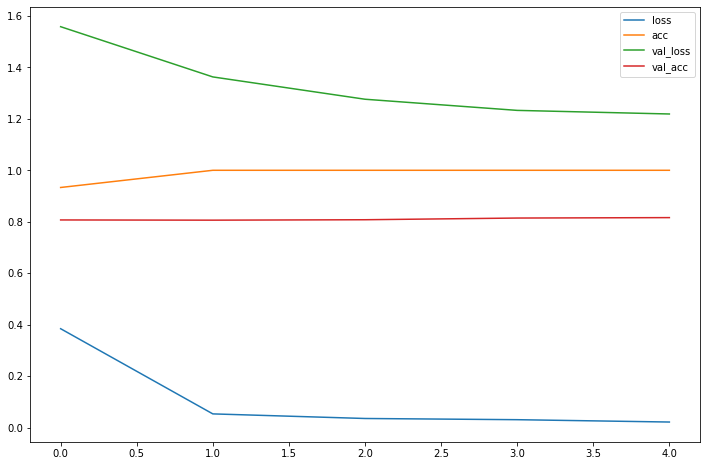

In [8]:
loss_df = pd.DataFrame(modelhis.history)
loss_df.plot(figsize=(12,8))